In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo
import pandas as pd

spambase = fetch_ucirepo(id=94)

X = spambase.data.features
y = spambase.data.targets

# select the feature and target

X = pd.DataFrame(data = X, columns = spambase.features)
y = pd.DataFrame(data = y, columns = spambase.targets)

# Convert to NumPy arrays after checking the type
X = X.to_numpy()  # If data is a DataFrame
y = y.to_numpy()  # If target is a DataFrame or Series


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n",cm)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9598262757871878
Confusion Matrix:
 [[559  12]
 [ 25 325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       571
           1       0.96      0.93      0.95       350

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.96       921
weighted avg       0.96      0.96      0.96       921



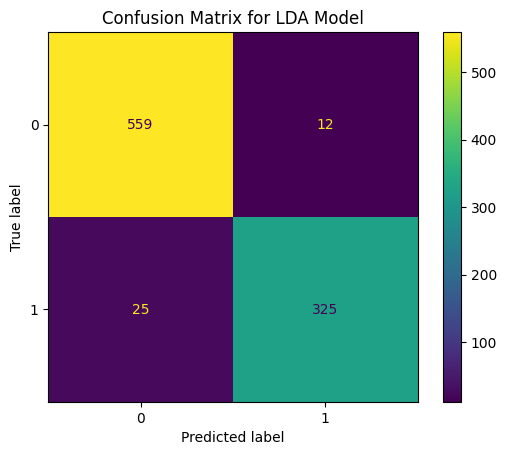

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='viridis', values_format='d')

plt.title('Confusion Matrix for LDA Model')
plt.show()